**Autor** : Jeferson Magalhães dos Santos

**e-mail**: jefersonmdossantos@gmail.com
    
**github**: jefersonmglh

#  <a name="indice">  Índice </a>

* [Resumo](#resumo)
* [1. Importação de pacotes e dados](#import)
* [2. Análise preliminar](#visualizacao)
* [3. Tratamento](#tratamento)
* [4. Correlação e Associação](#corr)
* [5. Treinamento do modelo de aprendizado](#modelo)
* [6. Avaliação do modelo](#avaliacao)
* [7. Aprimoramento do modelo](#aprimoramento)
* [8. Conclusão](#conclusao)

#  <a name="resumo"> RESUMO </a>
[Voltar ao índice](#indice)

""

#  <a name="import">1. Importação de pacotes e dados </a>
[Voltar ao índice](#indice)

In [140]:
#basic
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#graph
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import chart_studio.plotly as cplt
import plotly.graph_objs as go

# model&metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support, classification_report, accuracy_score, f1_score, confusion_matrix
from scipy.stats import chi2, chi2_contingency, iqr, pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier




In [48]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#  <a name="visualizacao">2. Análise preliminar</a>
[Voltar ao índice](#indice)

In [49]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
    
show_info(df)

DATASET SHAPE:  (891, 12) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

 --------------------------------------------------
NUMBER OF UNIQUE VALUES PER FEATURE: 

PassengerId    891
Survived         2
Pclass    

* eliminando variáveis que não serão usadas

In [50]:
df = df.drop(columns=['Cabin', 'Name', 'Ticket'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


#  <a name="tratamento">3. Tratamento</a>
[Voltar ao índice](#indice)

* PassengerID > index

In [51]:
df.set_index(['PassengerId'], inplace=True)

* transformando ['sex'] em binário

In [52]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [53]:
sex = {'male': '0', 'female': '1'}
df['Female_True'] = df['Sex'].replace(sex).astype('int64')

df['Female_True']

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    1
890    0
891    0
Name: Female_True, Length: 891, dtype: int64

In [54]:
df = df.drop(columns=['Sex'])


In [55]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Female_True
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Embarked     889 non-null    object 
 7   Female_True  891 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


<AxesSubplot:>

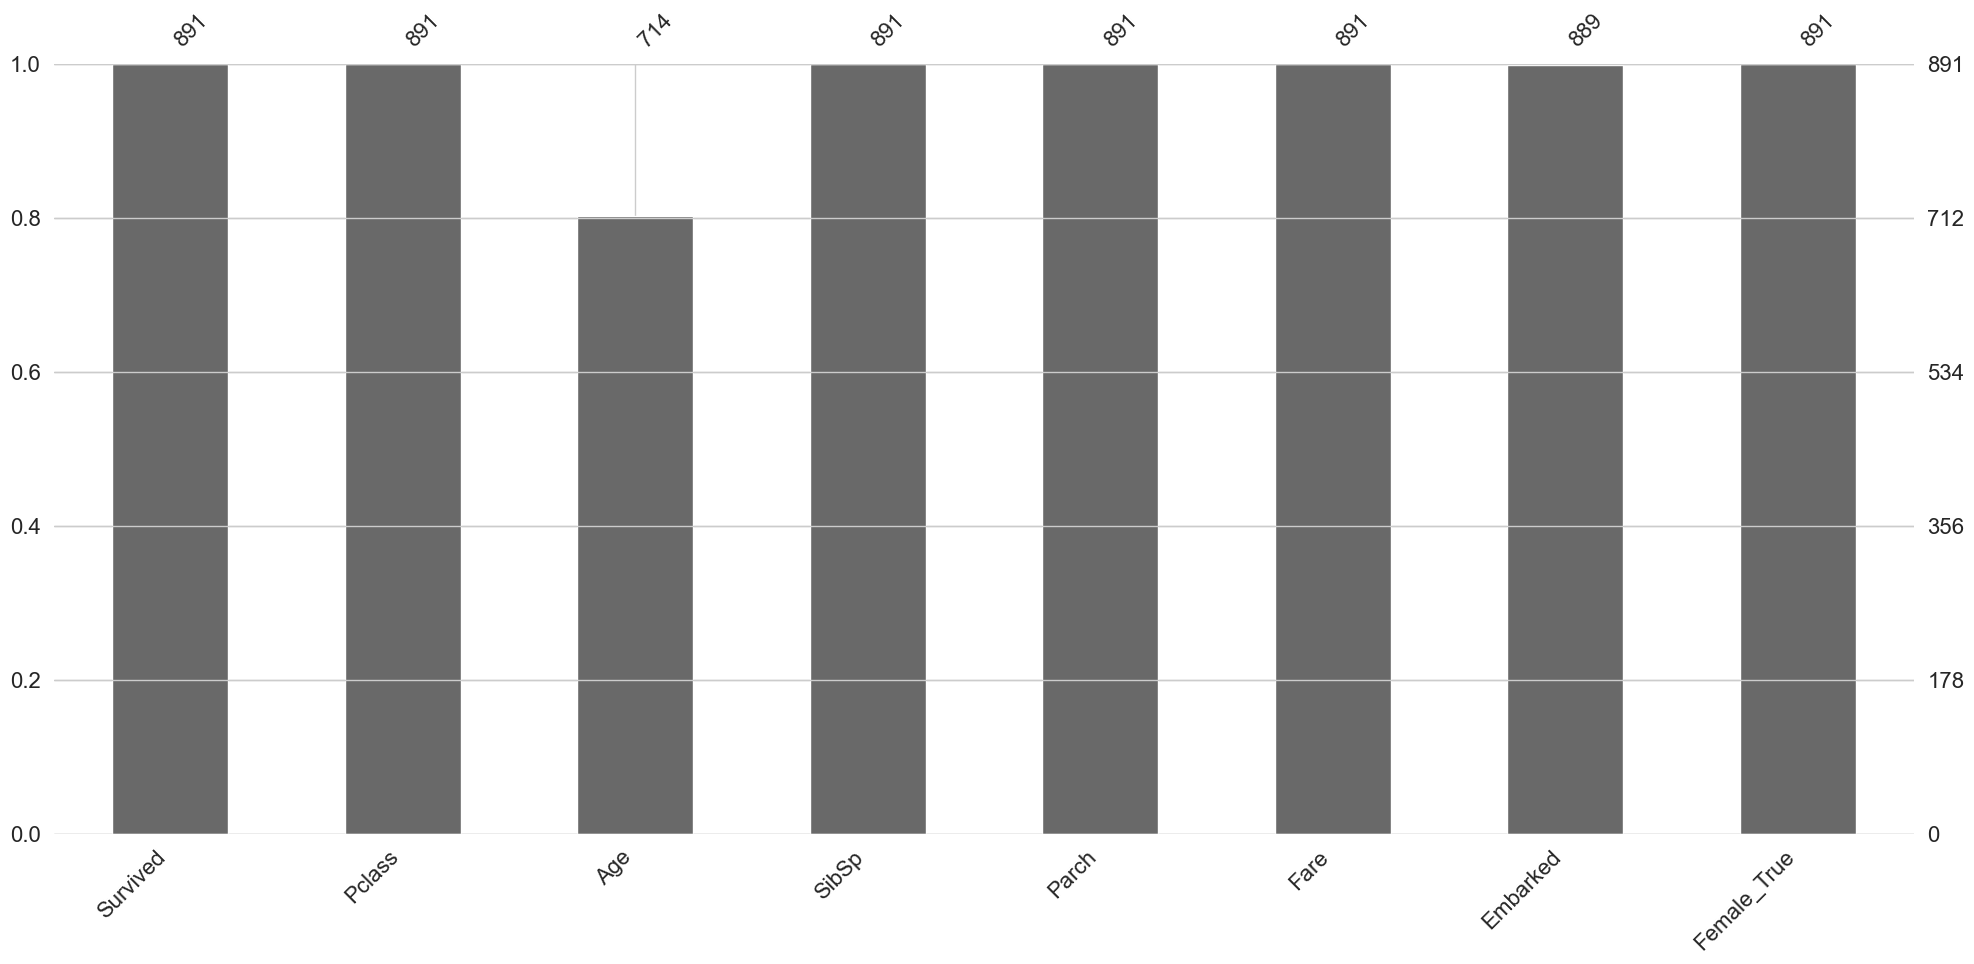

In [57]:
msno.bar(df)

* UniVar

In [58]:
quali_columns = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Female_True', 'Embarked']
df_quali = df[quali_columns]
df_quali.astype('str')

,Survived,Pclass,SibSp,Parch,Female_True,Embarked
PassengerId,,,,,,
1,0,3,1,0,0,S
2,1,1,1,0,1,C
3,1,3,0,0,1,S
4,1,1,1,0,1,S
5,0,3,0,0,0,S
...,...,...,...,...,...,...
887,0,2,0,0,0,S
888,1,1,0,0,1,S
889,0,3,1,2,1,S


Survived


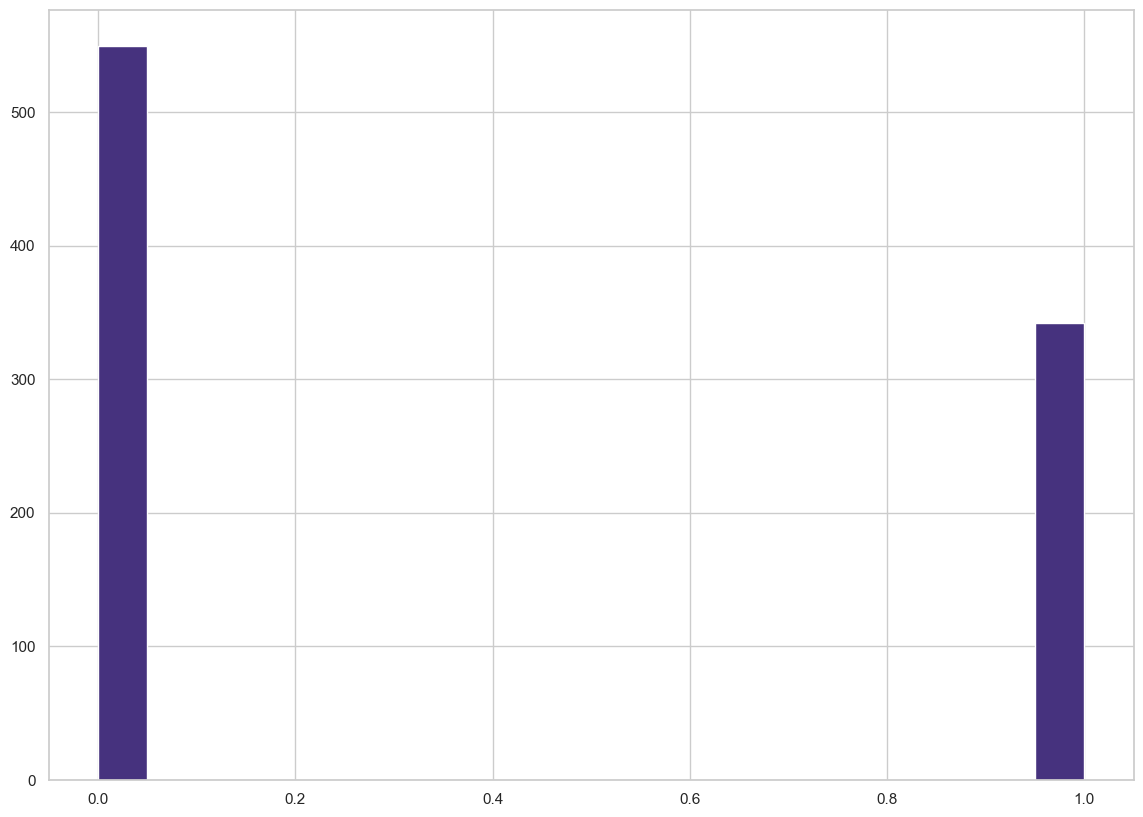

Pclass


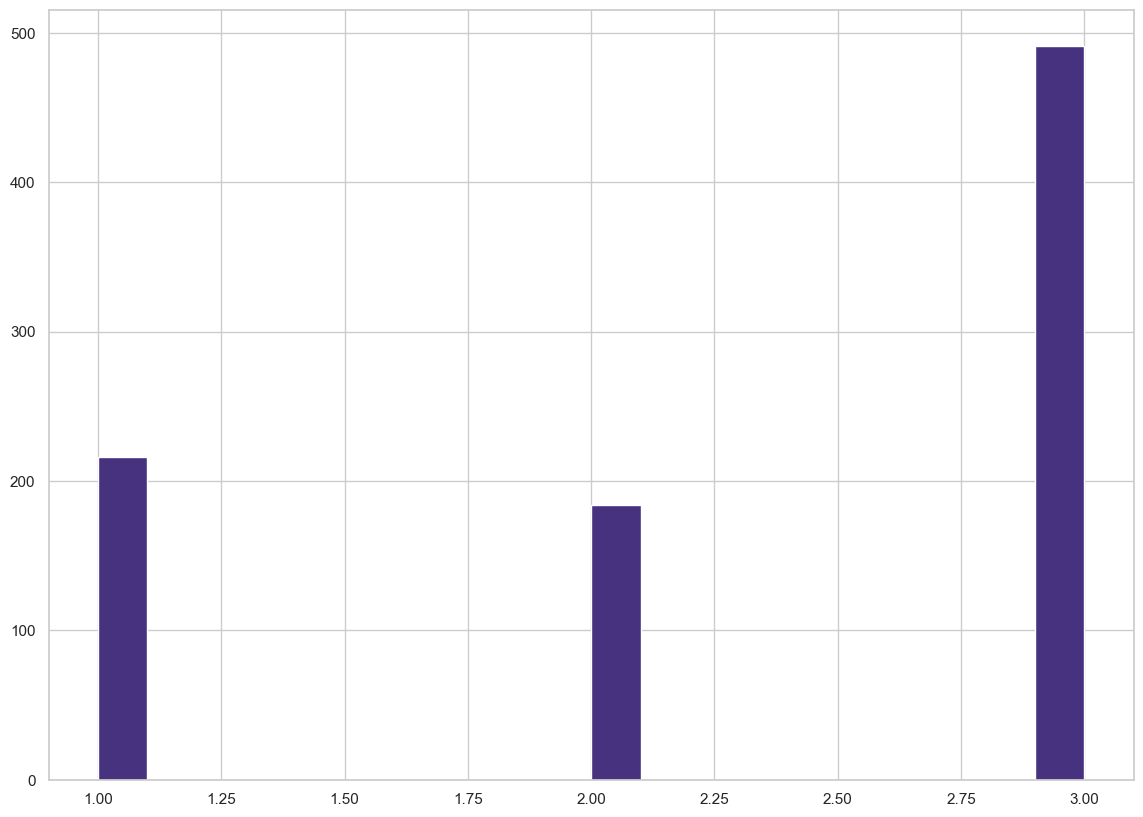

SibSp


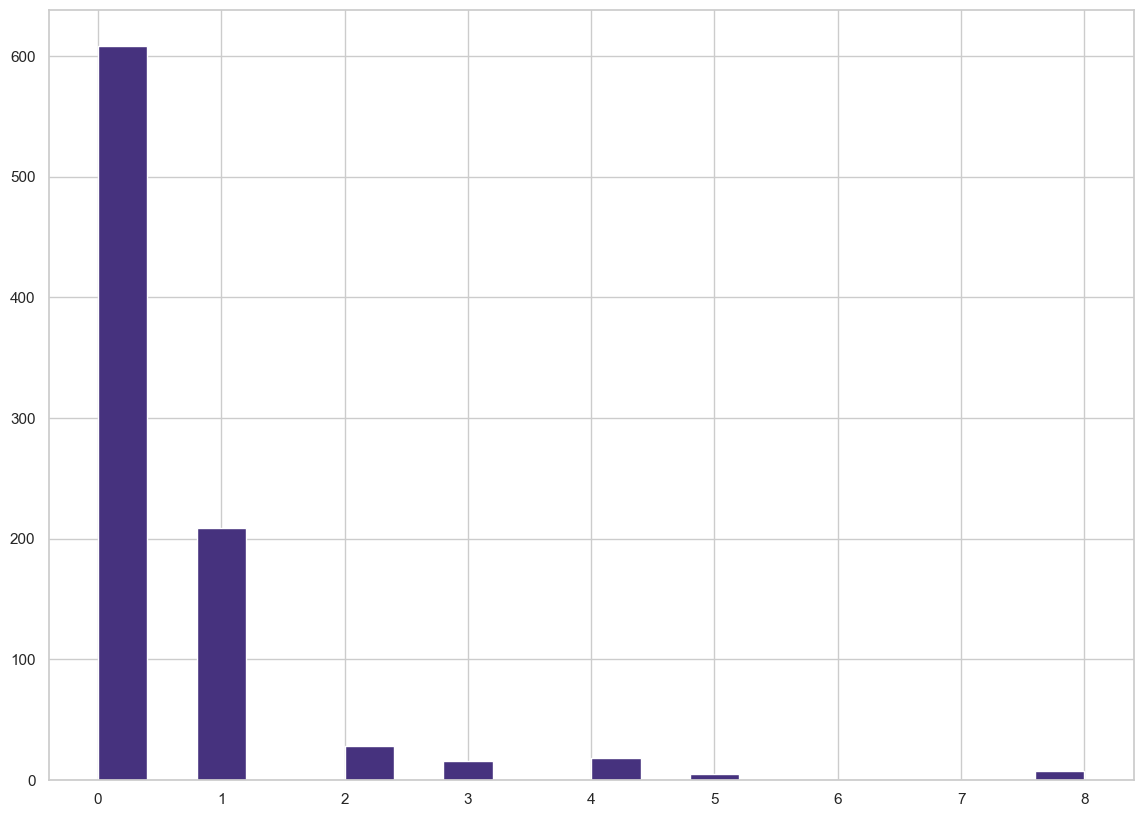

Parch


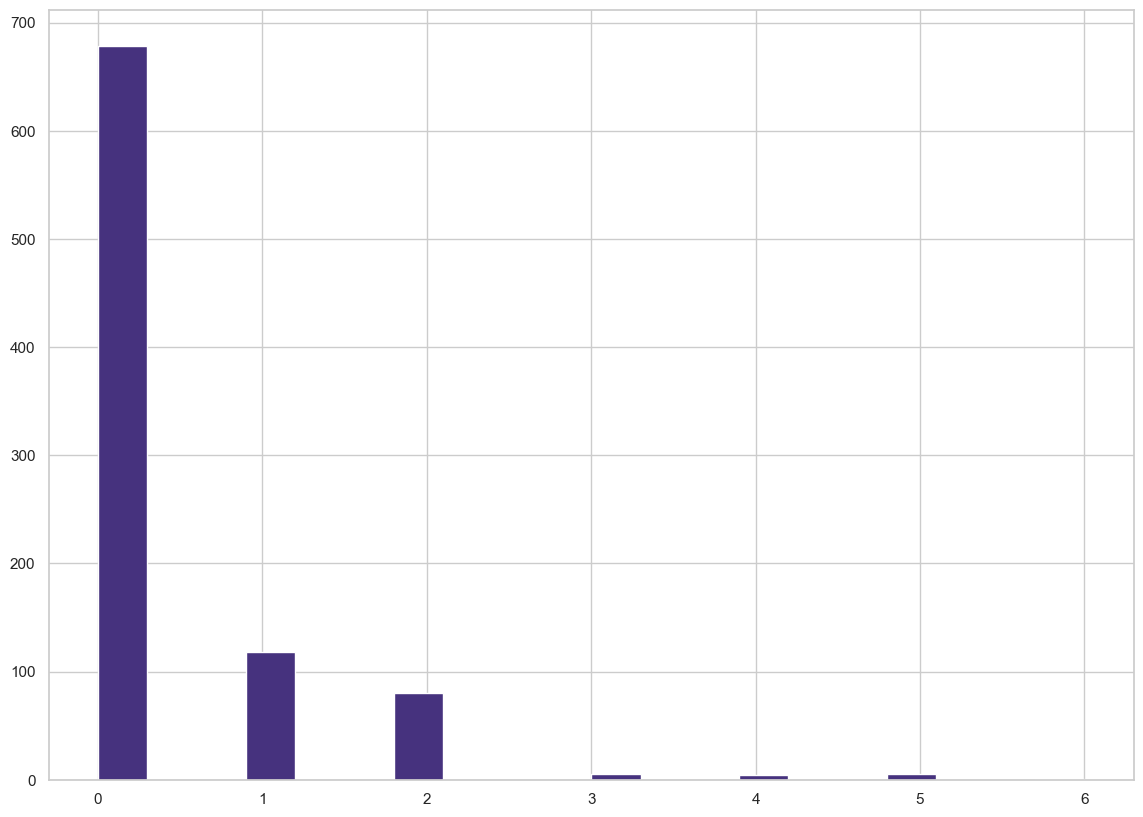

Female_True


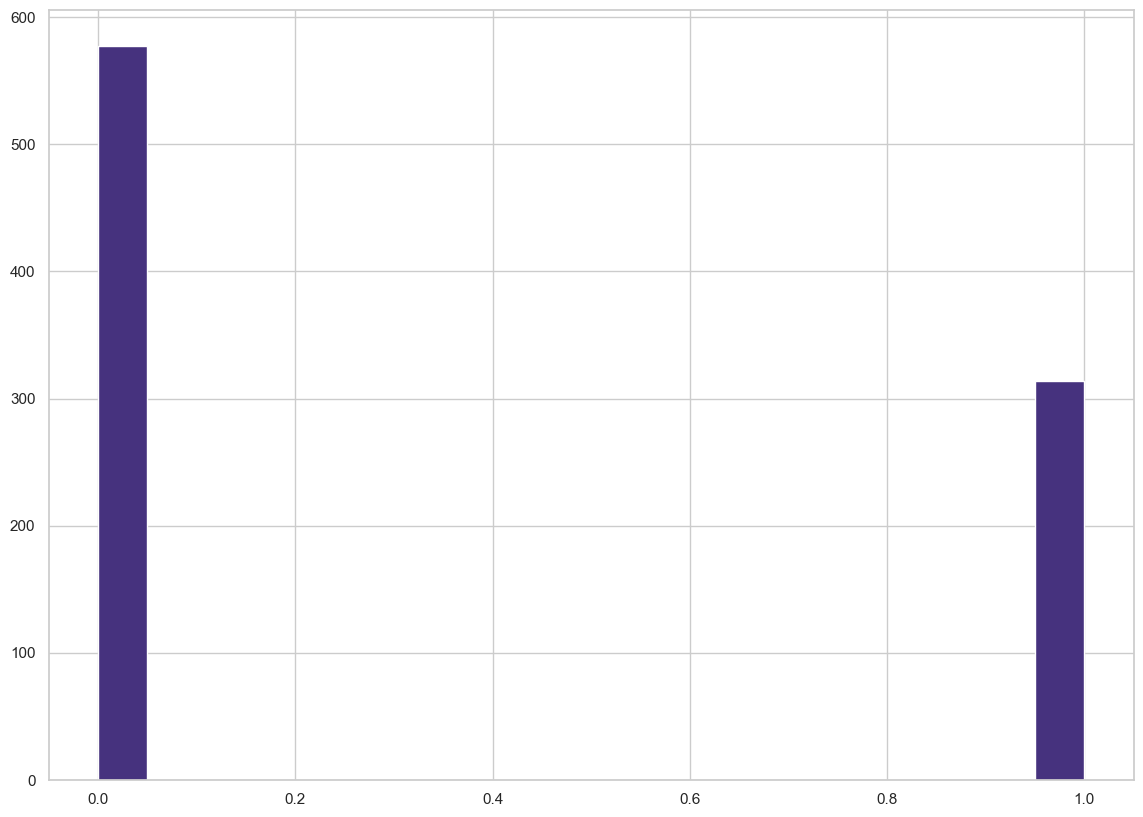

Embarked


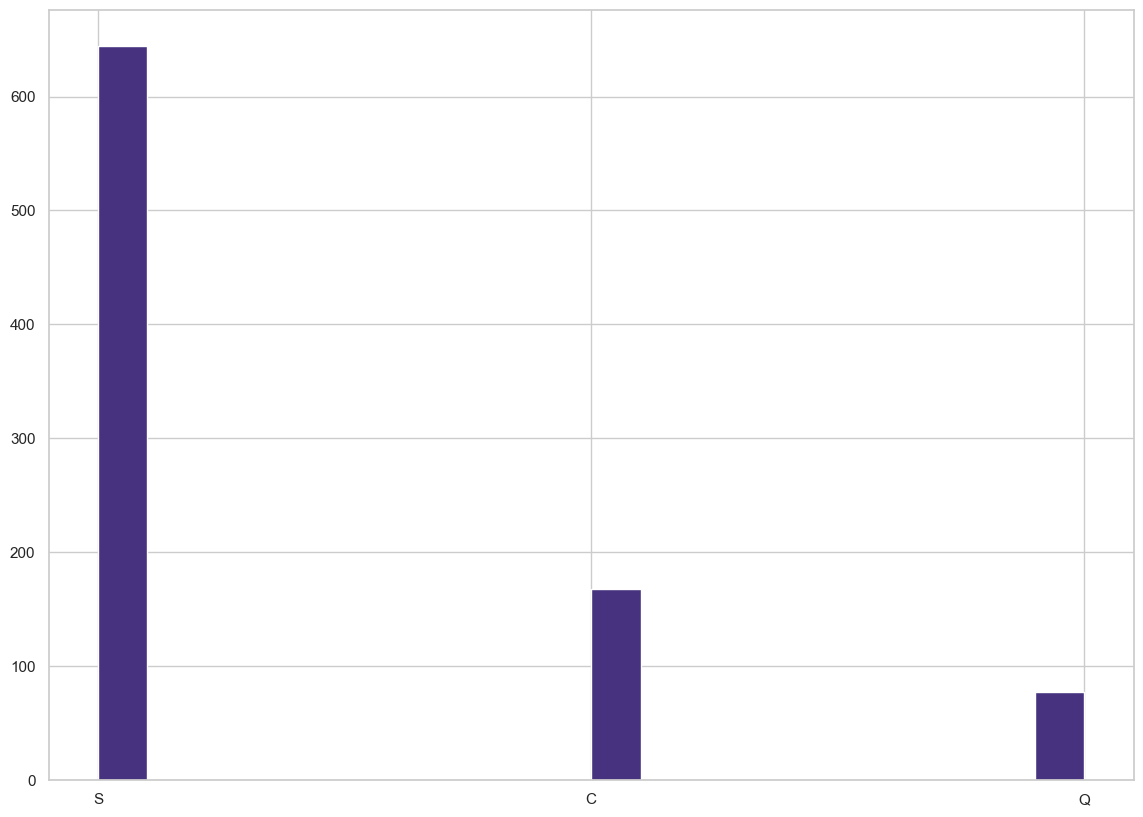

In [59]:
for var_quali in df_quali:
    print(var_quali)
    df_quali[var_quali].hist(bins=20)
    plt.show()

In [60]:
quanti_columns = ['Age', 'Fare']
df_quanti = df[quanti_columns]
df_quanti.head()

,Age,Fare
PassengerId,,
1,22.0,7.2500
2,38.0,71.2833
3,26.0,7.9250
4,35.0,53.1000
5,35.0,8.0500


Age


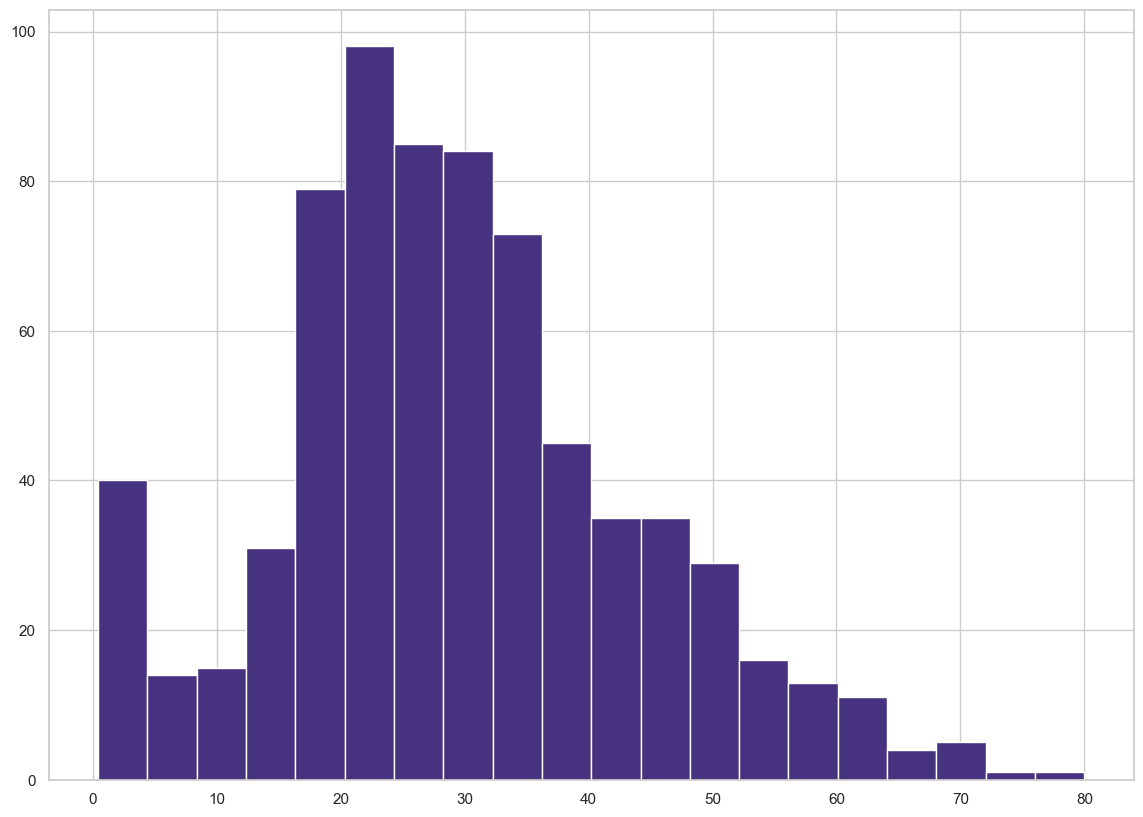

Fare


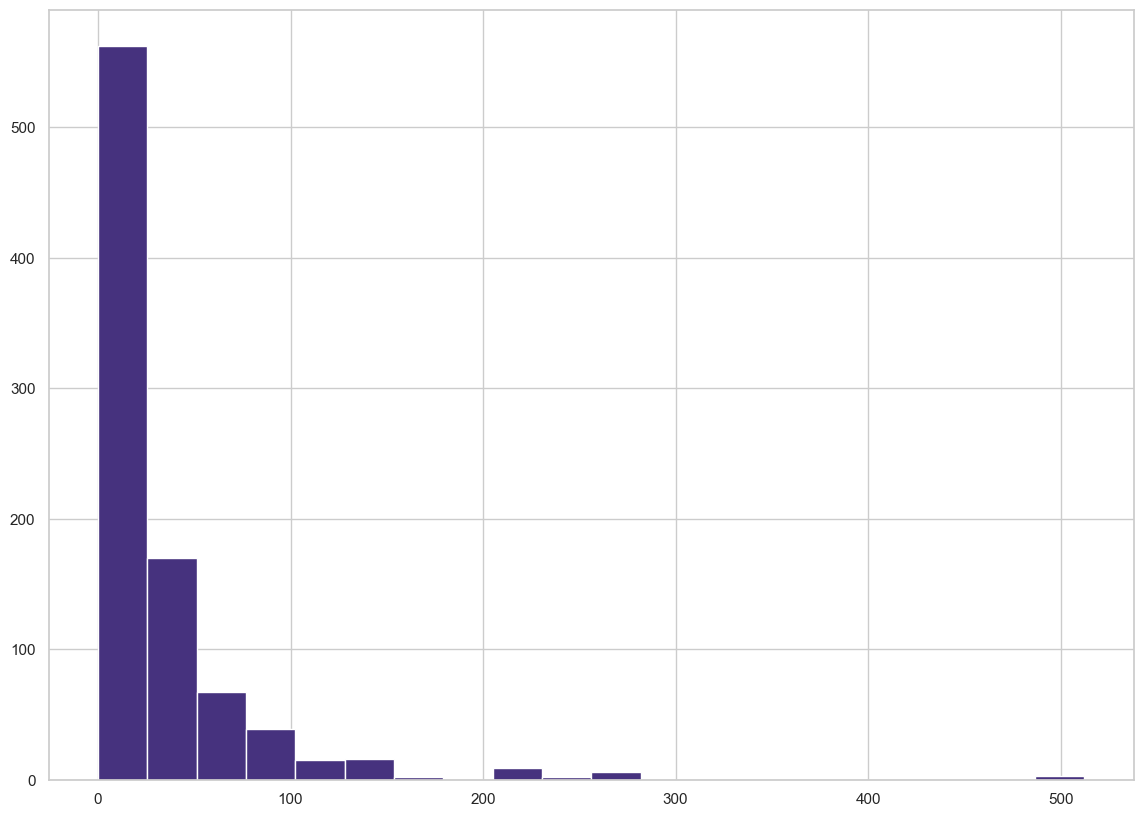

In [61]:
for var_quanti in df_quanti:
    print(var_quanti)
    df[var_quanti].hist(bins=20)
    plt.show()

* Preenchendo valores faltantes

In [62]:
df_quanti.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [63]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [64]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

* Outliers

In [65]:
df_quanti = df[quanti_columns]
df_quanti

,Age,Fare
PassengerId,,
1,22.000000,7.2500
2,38.000000,71.2833
3,26.000000,7.9250
4,35.000000,53.1000
5,35.000000,8.0500
...,...,...
887,27.000000,13.0000
888,19.000000,30.0000
889,29.699118,23.4500


In [66]:
scale = StandardScaler()

df_quanti2 = pd.DataFrame(scale.fit_transform(df_quanti))
df_quanti2.set_axis(['Age', 'Fare'], axis=1, inplace=True)
df_quanti2 = pd.DataFrame(df_quanti2.stack()).reset_index()
df_quanti2.drop('level_0', axis = 1, inplace = True)
df_quanti2.rename(columns = {'level_1':'variables', 0:'standard_value'}, inplace = True)
df_quanti2

,variables,standard_value
0,Age,-0.592481
1,Fare,-0.502445
2,Age,0.638789
3,Fare,0.786845
4,Age,-0.284663
...,...,...
1777,Fare,-0.176263
1778,Age,-0.284663
1779,Fare,-0.044381
1780,Age,0.177063


[Text(0.5, 0, 'Standard Values'),
 Text(0, 0.5, 'Variables'),
 Text(0.5, 1.0, 'Boxplot "Age" and "Fare"')]

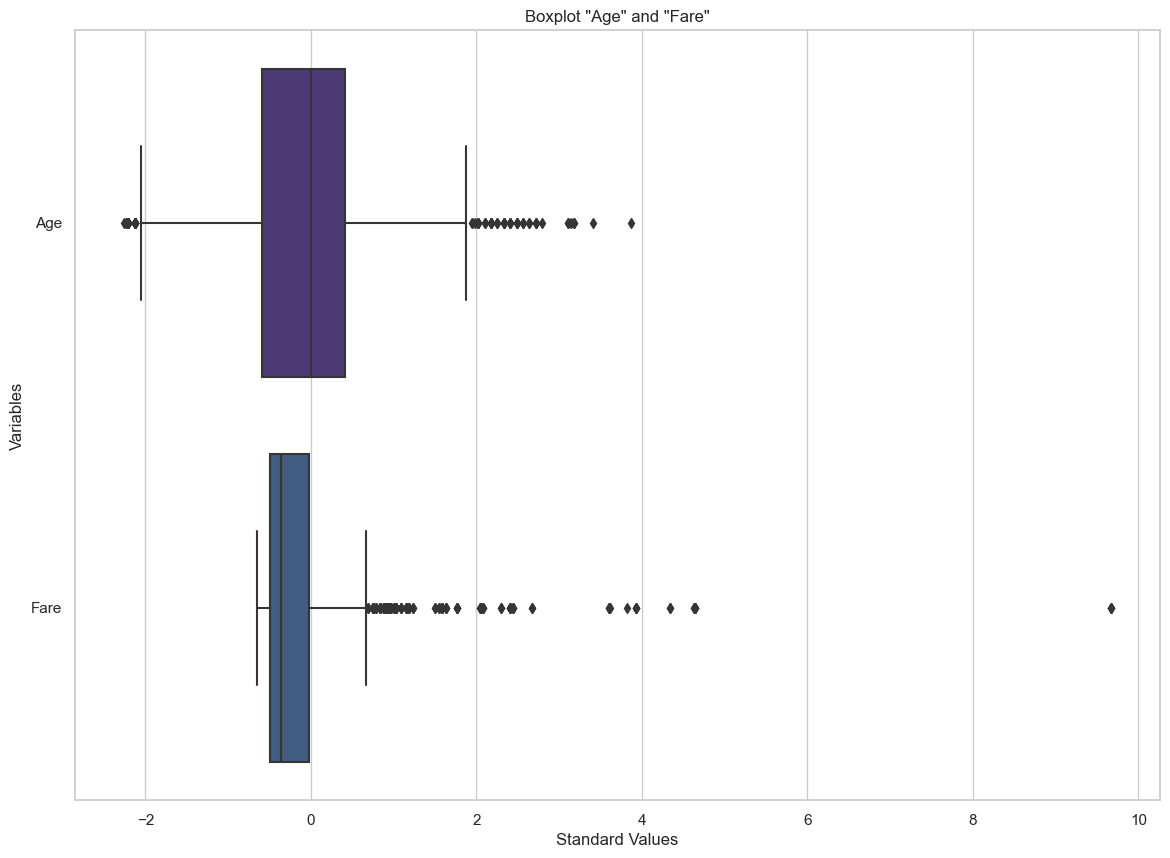

In [67]:
sns.set(rc={'figure.figsize':(14, 10)})
sns.set_theme(style="whitegrid", palette="viridis")

box = sns.boxplot(y = "variables", x = "standard_value", data = df_quanti2)
box.set(xlabel ="Standard Values", ylabel = "Variables", title ='Boxplot "Age" and "Fare"')

* Removendo outliers (alpha = 0,05)

In [68]:
df_quanti = pd.DataFrame(df_quanti.stack()).reset_index()
df_quanti.drop('PassengerId', axis = 1, inplace = True)
df_quanti.rename(columns = {'level_1':'var_origin', 0:'value'}, inplace = True)
df_quanti = pd.concat([df_quanti.reset_index(drop=True), df_quanti2.reset_index(drop=True)], axis=1)
df_quanti = df_quanti[(df_quanti['standard_value'] >= -1.96) & (df_quanti['standard_value'] <= 1.96)]

df_quanti

,var_origin,value,variables,standard_value
0,Age,22.0000,Age,-0.592481
1,Fare,7.2500,Fare,-0.502445
2,Age,38.0000,Age,0.638789
3,Fare,71.2833,Fare,0.786845
4,Age,26.0000,Age,-0.284663
...,...,...,...,...
1777,Fare,23.4500,Fare,-0.176263
1778,Age,26.0000,Age,-0.284663
1779,Fare,30.0000,Fare,-0.044381
1780,Age,32.0000,Age,0.177063


variables
Age     [[AxesSubplot(0.125,0.11;0.336957x0.77), AxesS...
Fare    [[AxesSubplot(0.125,0.11;0.336957x0.77), AxesS...
dtype: object

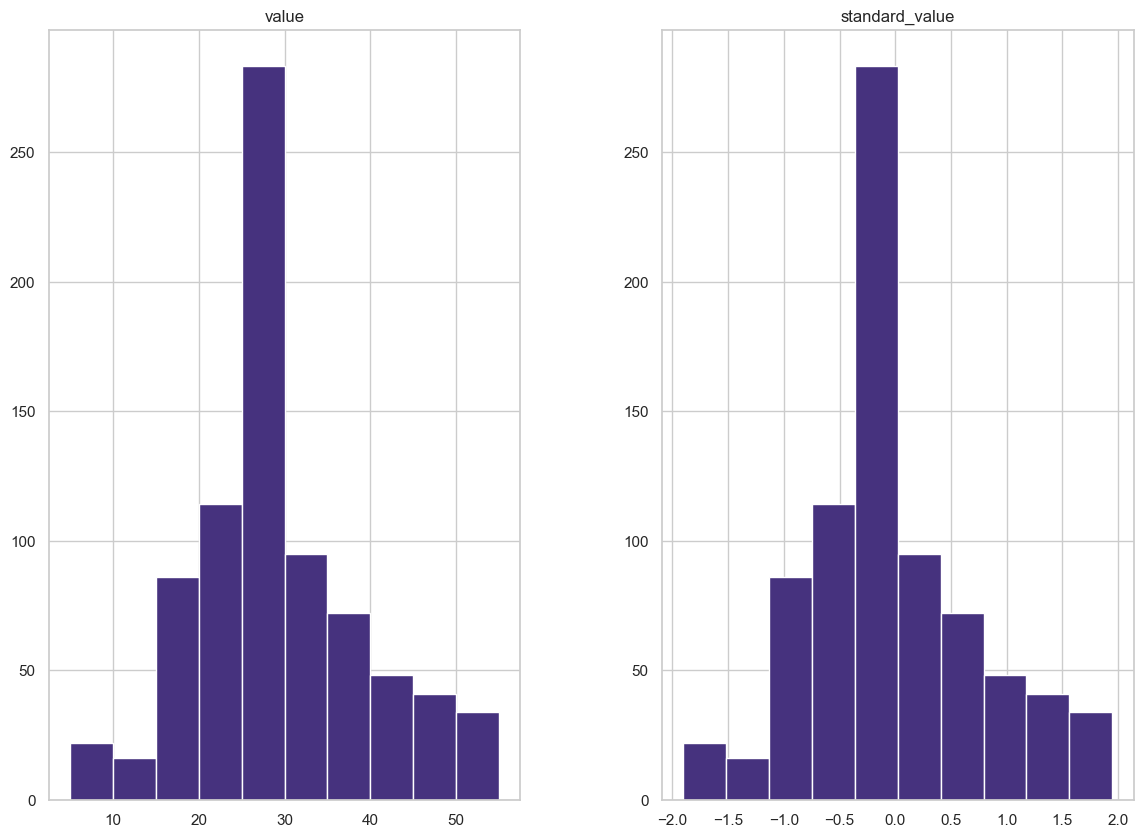

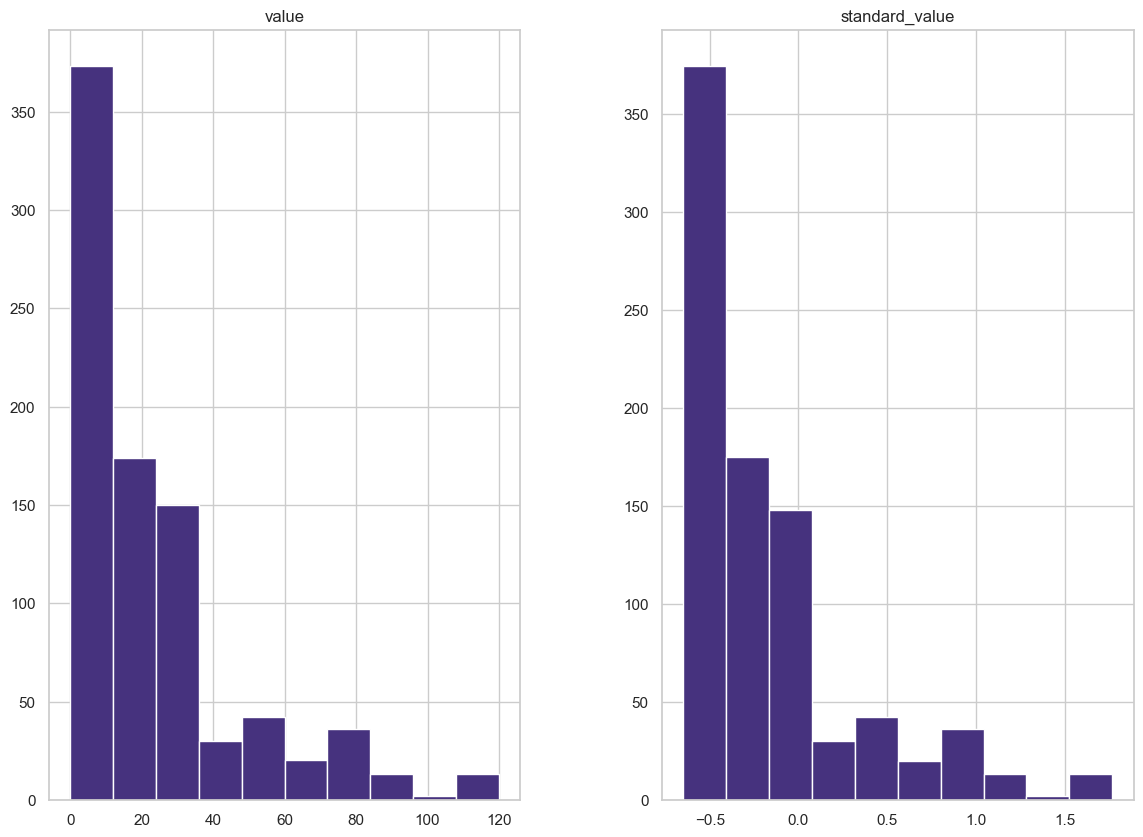

In [69]:
df_quanti.groupby(['variables']).hist()

In [70]:
min_values = pd.DataFrame(df_quanti.groupby('var_origin')['value'].min())
max_values = pd.DataFrame(df_quanti.groupby('var_origin')['value'].max())

min_values, max_values

(            value
 var_origin       
 Age           5.0
 Fare          0.0,
             value
 var_origin       
 Age          55.0
 Fare        120.0)

In [71]:
#GERANDO DATAFRAME COM REMOÇÃO DE OUTLIERS
df2 = df[(df['Age'] <= max_values.loc['Age', 'value']) 
                        & (df['Fare'] <= max_values.loc['Fare', 'value'])]
df2

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Female_True
PassengerId,,,,,,,,
1,0,3,22.000000,1,0,7.2500,S,0
2,1,1,38.000000,1,0,71.2833,C,1
3,1,3,26.000000,0,0,7.9250,S,1
4,1,1,35.000000,1,0,53.1000,S,1
5,0,3,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.0000,S,0
888,1,1,19.000000,0,0,30.0000,S,1
889,0,3,29.699118,1,2,23.4500,S,1


In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 1 to 891
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     816 non-null    int64  
 1   Pclass       816 non-null    int64  
 2   Age          816 non-null    float64
 3   SibSp        816 non-null    int64  
 4   Parch        816 non-null    int64  
 5   Fare         816 non-null    float64
 6   Embarked     816 non-null    object 
 7   Female_True  816 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 57.4+ KB


[Text(0.5, 0, 'Valores'), Text(0, 0.5, ''), Text(0.5, 1.0, 'Boxplot Age')]

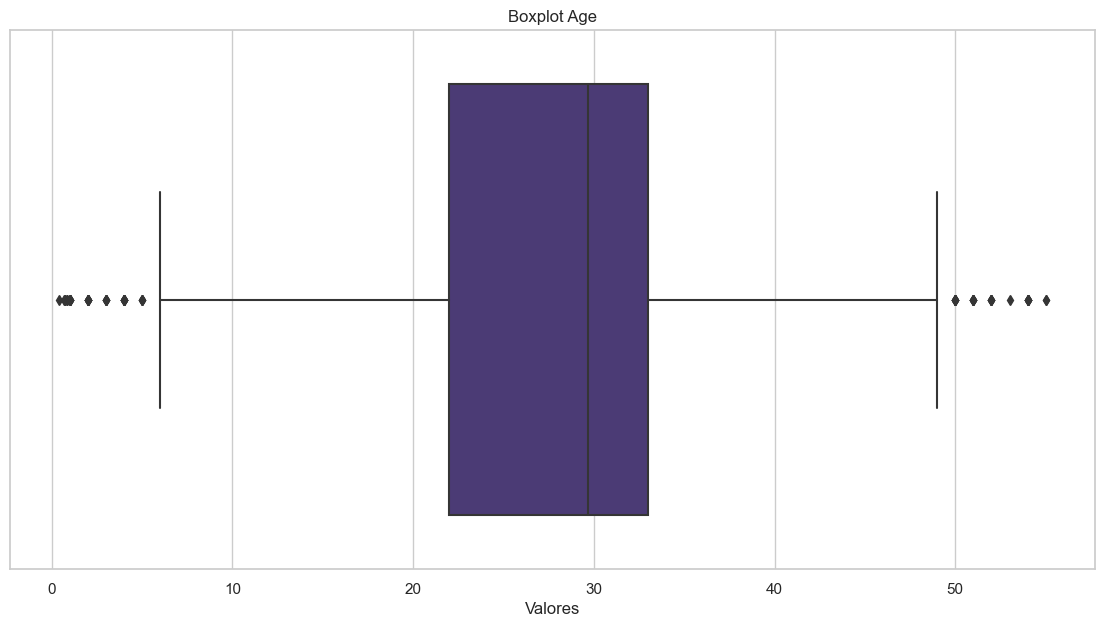

In [73]:
sns.set(rc={'figure.figsize':(14, 7)})
sns.set_theme(style="whitegrid", palette="viridis")

box1 = sns.boxplot(x = df2['Age'], data = df2)
box1.set(xlabel ="Valores", ylabel = "", title =f'Boxplot Age')

[Text(0.5, 0, 'Valores'), Text(0, 0.5, ''), Text(0.5, 1.0, 'Boxplot Fare')]

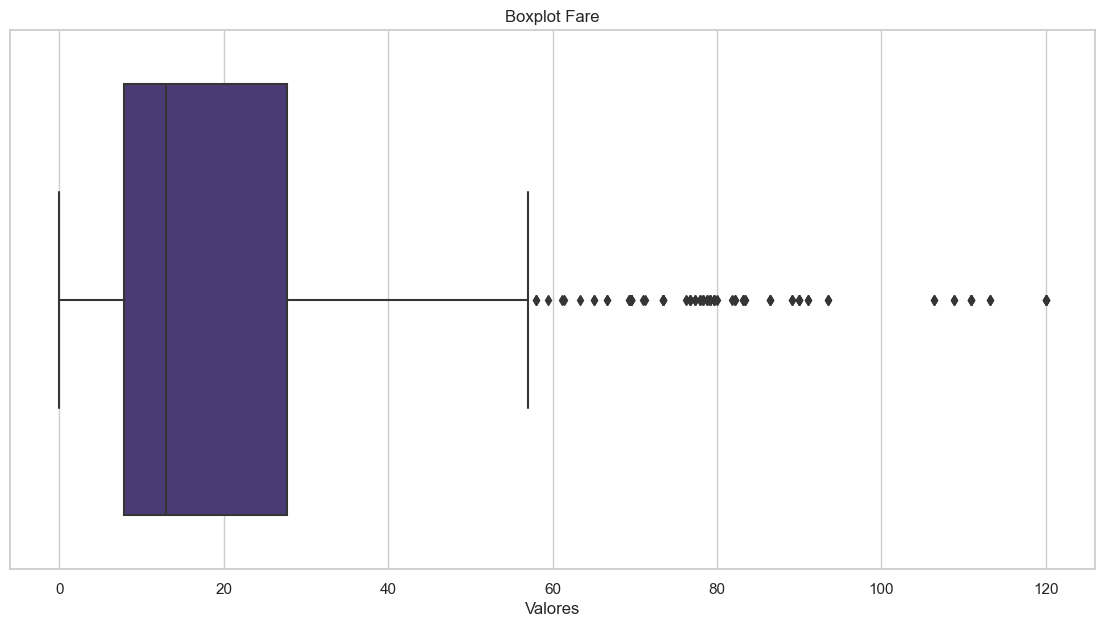

In [74]:
sns.set(rc={'figure.figsize':(14, 7)})
sns.set_theme(style="whitegrid", palette="viridis")

box1 = sns.boxplot(x = df2['Fare'], data = df2)
box1.set(xlabel ="Valores", ylabel = "", title =f'Boxplot Fare')

* nova remoção OutLiers

In [75]:
df_quant_out = df2[quanti_columns]

In [76]:
scale = StandardScaler()

df_quanti_std = pd.DataFrame(scale.fit_transform(df_quant_out))
df_quanti_std.set_axis(['Age', 'Fare'], axis=1, inplace=True)
df_quanti_std = pd.DataFrame(df_quanti_std.stack()).reset_index()
df_quanti_std.drop('level_0', axis = 1, inplace = True)
df_quanti_std.rename(columns = {'level_1':'variables', 0:'standard_value'}, inplace = True)
df_quanti_std

,variables,standard_value
0,Age,-0.550667
1,Fare,-0.691593
2,Age,0.895275
3,Fare,2.026470
4,Age,-0.189182
...,...,...
1627,Fare,-0.003942
1628,Age,-0.189182
1629,Fare,0.274091
1630,Age,0.353047


[Text(0.5, 0, 'Standard Values'),
 Text(0, 0.5, 'Variables'),
 Text(0.5, 1.0, 'Boxplot "Age" and "Fare"')]

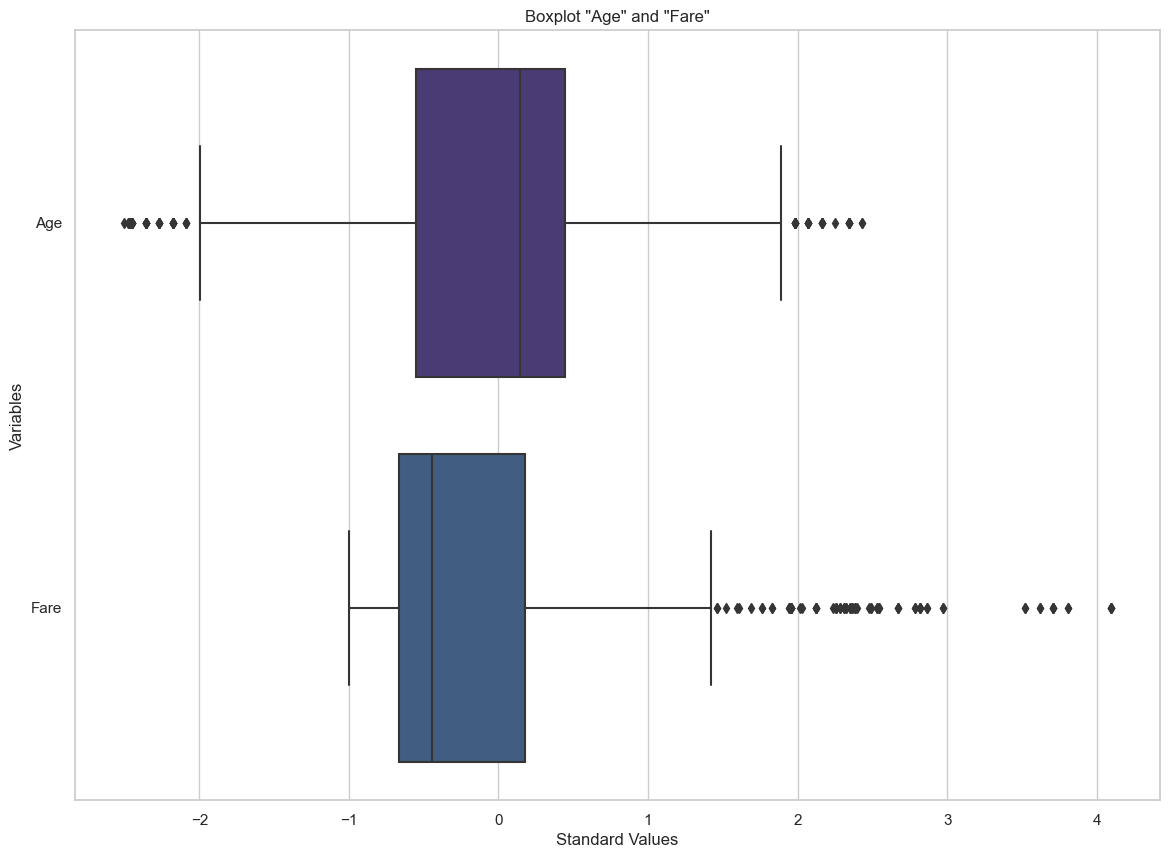

In [77]:
sns.set(rc={'figure.figsize':(14, 10)})
sns.set_theme(style="whitegrid", palette="viridis")

box = sns.boxplot(y = "variables", x = "standard_value", data = df_quanti_std)
box.set(xlabel ="Standard Values", ylabel = "Variables", title ='Boxplot "Age" and "Fare"')

In [78]:

df_quanti_out = pd.DataFrame(df_quant_out.stack()).reset_index()
df_quanti_out.drop('PassengerId', axis = 1, inplace = True)
df_quanti_out.rename(columns = {'level_1':'var_origin', 0:'value'}, inplace = True)
df_quanti_out = pd.concat([df_quanti_out.reset_index(drop=True), df_quanti_std.reset_index(drop=True)], axis=1)
df_quanti_out = df_quanti_out[(df_quanti_out['standard_value'] >= -1.96) & (df_quanti_out['standard_value'] <= 1.96)]
df_quanti_out

,var_origin,value,variables,standard_value
0,Age,22.000,Age,-0.550667
1,Fare,7.250,Fare,-0.691593
2,Age,38.000,Age,0.895275
4,Age,26.000,Age,-0.189182
5,Fare,7.925,Fare,-0.662941
...,...,...,...,...
1627,Fare,23.450,Fare,-0.003942
1628,Age,26.000,Age,-0.189182
1629,Fare,30.000,Fare,0.274091
1630,Age,32.000,Age,0.353047


In [79]:
min_values = pd.DataFrame(df_quanti_out.groupby('var_origin')['value'].min())
max_values = pd.DataFrame(df_quanti_out.groupby('var_origin')['value'].max())

min_values, max_values

(            value
 var_origin       
 Age           7.0
 Fare          0.0,
             value
 var_origin       
 Age         49.00
 Fare        69.55)

In [80]:
df3 = df2[(df2['Age'] <= max_values.loc['Age', 'value']) 
                        & (df2['Fare'] <= max_values.loc['Fare', 'value'])]
df3

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Female_True
PassengerId,,,,,,,,
1,0,3,22.000000,1,0,7.2500,S,0
3,1,3,26.000000,0,0,7.9250,S,1
4,1,1,35.000000,1,0,53.1000,S,1
5,0,3,35.000000,0,0,8.0500,S,0
6,0,3,29.699118,0,0,8.4583,Q,0
...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.0000,S,0
888,1,1,19.000000,0,0,30.0000,S,1
889,0,3,29.699118,1,2,23.4500,S,1


[Text(0.5, 0, 'Valores'), Text(0, 0.5, ''), Text(0.5, 1.0, 'Boxplot Fare')]

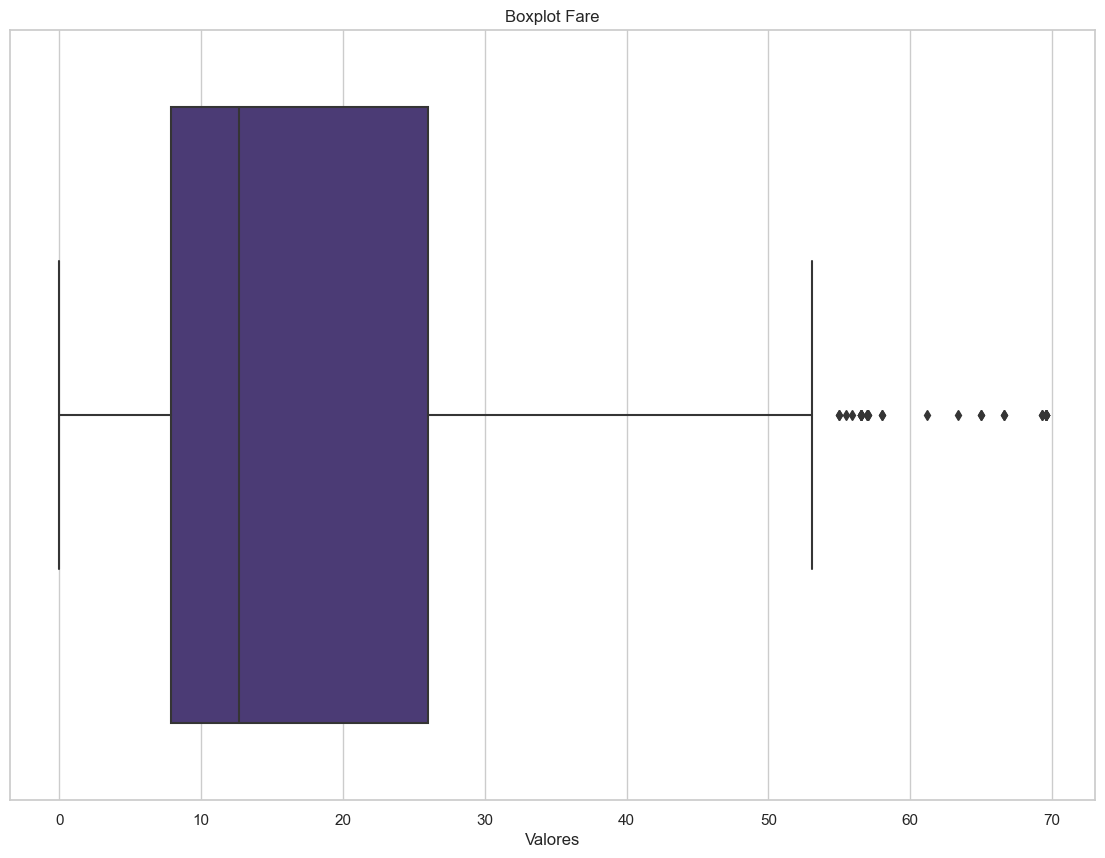

In [81]:
box1 = sns.boxplot(x = df3['Fare'], data = df3)
box1.set(xlabel ="Valores", ylabel = "", title =f'Boxplot Fare')

[Text(0.5, 0, 'Valores'), Text(0, 0.5, ''), Text(0.5, 1.0, 'Boxplot Age')]

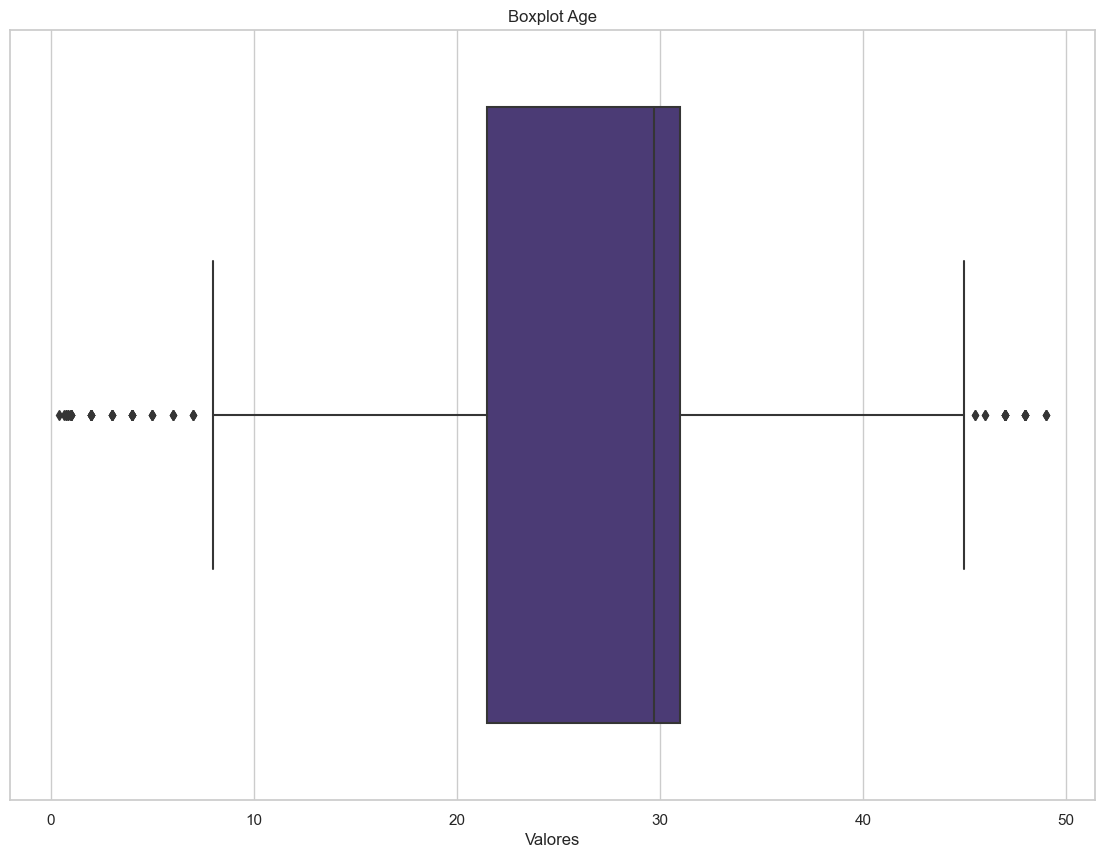

In [82]:
box1 = sns.boxplot(x = df3['Age'], data = df3)
box1.set(xlabel ="Valores", ylabel = "", title =f'Boxplot Age')

In [83]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 891
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     731 non-null    int64  
 1   Pclass       731 non-null    int64  
 2   Age          731 non-null    float64
 3   SibSp        731 non-null    int64  
 4   Parch        731 non-null    int64  
 5   Fare         731 non-null    float64
 6   Embarked     731 non-null    object 
 7   Female_True  731 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 51.4+ KB


#  <a name="corr">4. Correlação e associação</a>
[Voltar ao índice](#indice)

* quanti

In [84]:
df_quanti = df3[quanti_columns]
df_quanti

,Age,Fare
PassengerId,,
1,22.000000,7.2500
3,26.000000,7.9250
4,35.000000,53.1000
5,35.000000,8.0500
6,29.699118,8.4583
...,...,...
887,27.000000,13.0000
888,19.000000,30.0000
889,29.699118,23.4500


* pearson corr

In [85]:
corr_quanti = pearsonr(df_quanti['Age'], df_quanti['Fare'])
corr_quanti

PearsonRResult(statistic=0.007360693112897006, pvalue=0.8425183404615519)

<AxesSubplot:title={'center':'Correlação entre as variáveis'}>

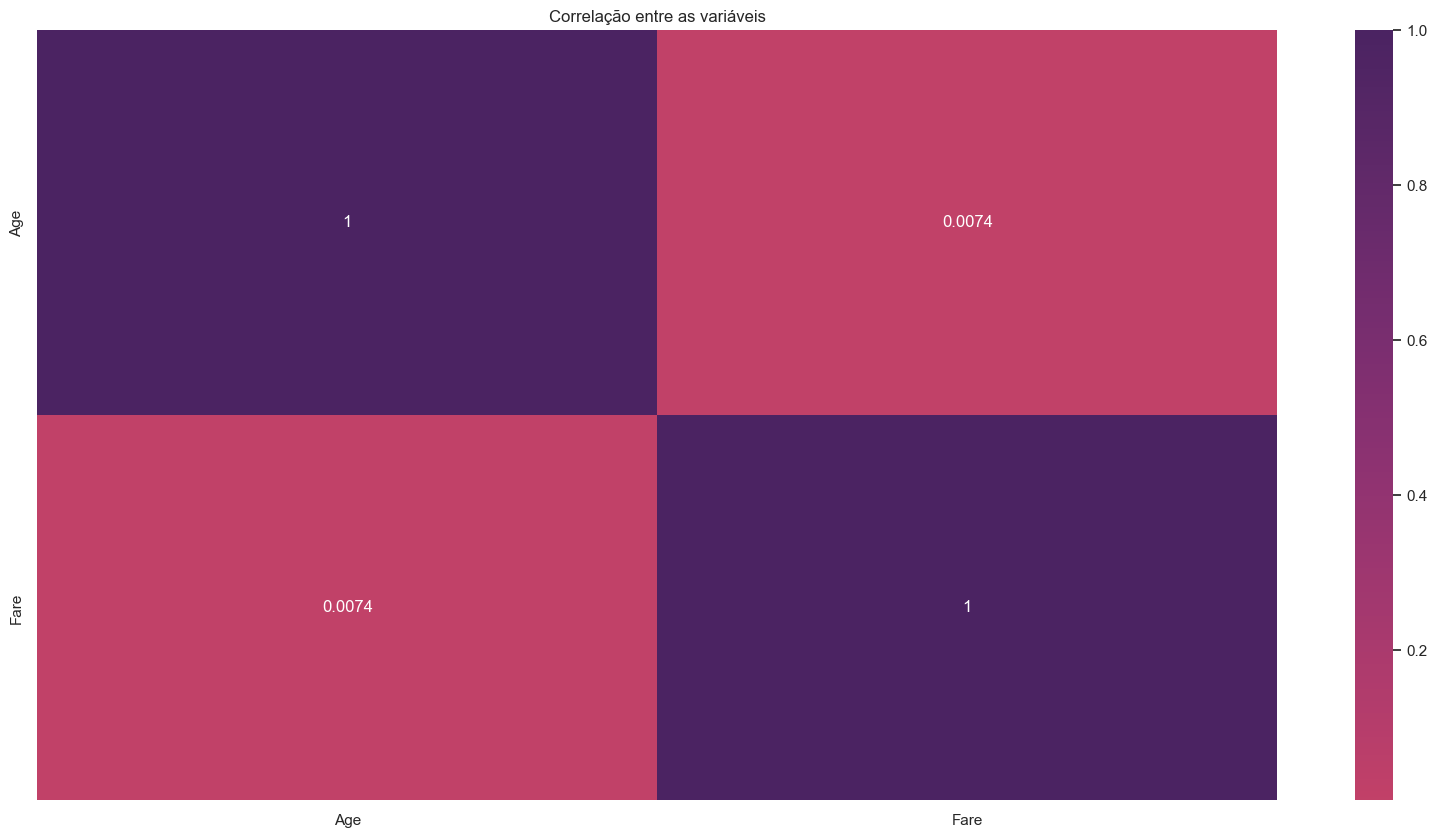

In [86]:
plt.figure(figsize=(20,10))
plt.title('Correlação entre as variáveis')
sns.heatmap(df_quanti.corr(),cmap='flare', center=0, annot=True)

* corr entre quali

In [87]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 891
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     731 non-null    int64  
 1   Pclass       731 non-null    int64  
 2   Age          731 non-null    float64
 3   SibSp        731 non-null    int64  
 4   Parch        731 non-null    int64  
 5   Fare         731 non-null    float64
 6   Embarked     731 non-null    object 
 7   Female_True  731 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 51.4+ KB


In [88]:
pclass = pd.crosstab(df3['Survived'], df3['Pclass'])


stat, p, dof, expected = chi2_contingency(pclass)

prob = 0.95

critical = chi2.ppf(prob, dof)

if abs(stat) >= critical:
	print('Rejeitar H0')
else:
	print('Não se pode rejeitar H0')

alpha = 1.0 - prob

print('significancia=%.3f, p=%.3f' % (alpha, p))

if p <= alpha:
	print('Rejeitar H0')
else:
	print('Não se pode rejeitar H0')

Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0


In [89]:
sibsp = pd.crosstab(df3['Survived'], df3['SibSp'])


stat, p, dof, expected = chi2_contingency(sibsp)

prob = 0.95

critical = chi2.ppf(prob, dof)

if abs(stat) >= critical:
	print('Rejeitar H0')
else:
	print('Não se pode rejeitar H0')

alpha = 1.0 - prob

print('significancia=%.3f, p=%.3f' % (alpha, p))

if p <= alpha:
	print('Rejeitar H0')
else:
	print('Não se pode rejeitar H0')

Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0


In [90]:
parch = pd.crosstab(df3['Survived'], df3['Parch'])


stat, p, dof, expected = chi2_contingency(parch)

prob = 0.95

critical = chi2.ppf(prob, dof)

if abs(stat) >= critical:
	print('Rejeitar H0')
else:
	print('Não se pode rejeitar H0')

alpha = 1.0 - prob

print('significancia=%.3f, p=%.3f' % (alpha, p))

if p <= alpha:
	print('Rejeitar H0')
else:
	print('Não se pode rejeitar H0')

Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0


In [93]:
fem = pd.crosstab(df3['Survived'], df3['Female_True'])


stat, p, dof, expected = chi2_contingency(fem)

prob = 0.95

critical = chi2.ppf(prob, dof)

if abs(stat) >= critical:
	print('Rejeitar H0')
else:
	print('Não se pode rejeitar H0')

alpha = 1.0 - prob

print('significancia=%.3f, p=%.3f' % (alpha, p))

if p <= alpha:
	print('Rejeitar H0')
else:
	print('Não se pode rejeitar H0')

Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0


In [94]:
df = df3


<Figure size 1500x700 with 0 Axes>

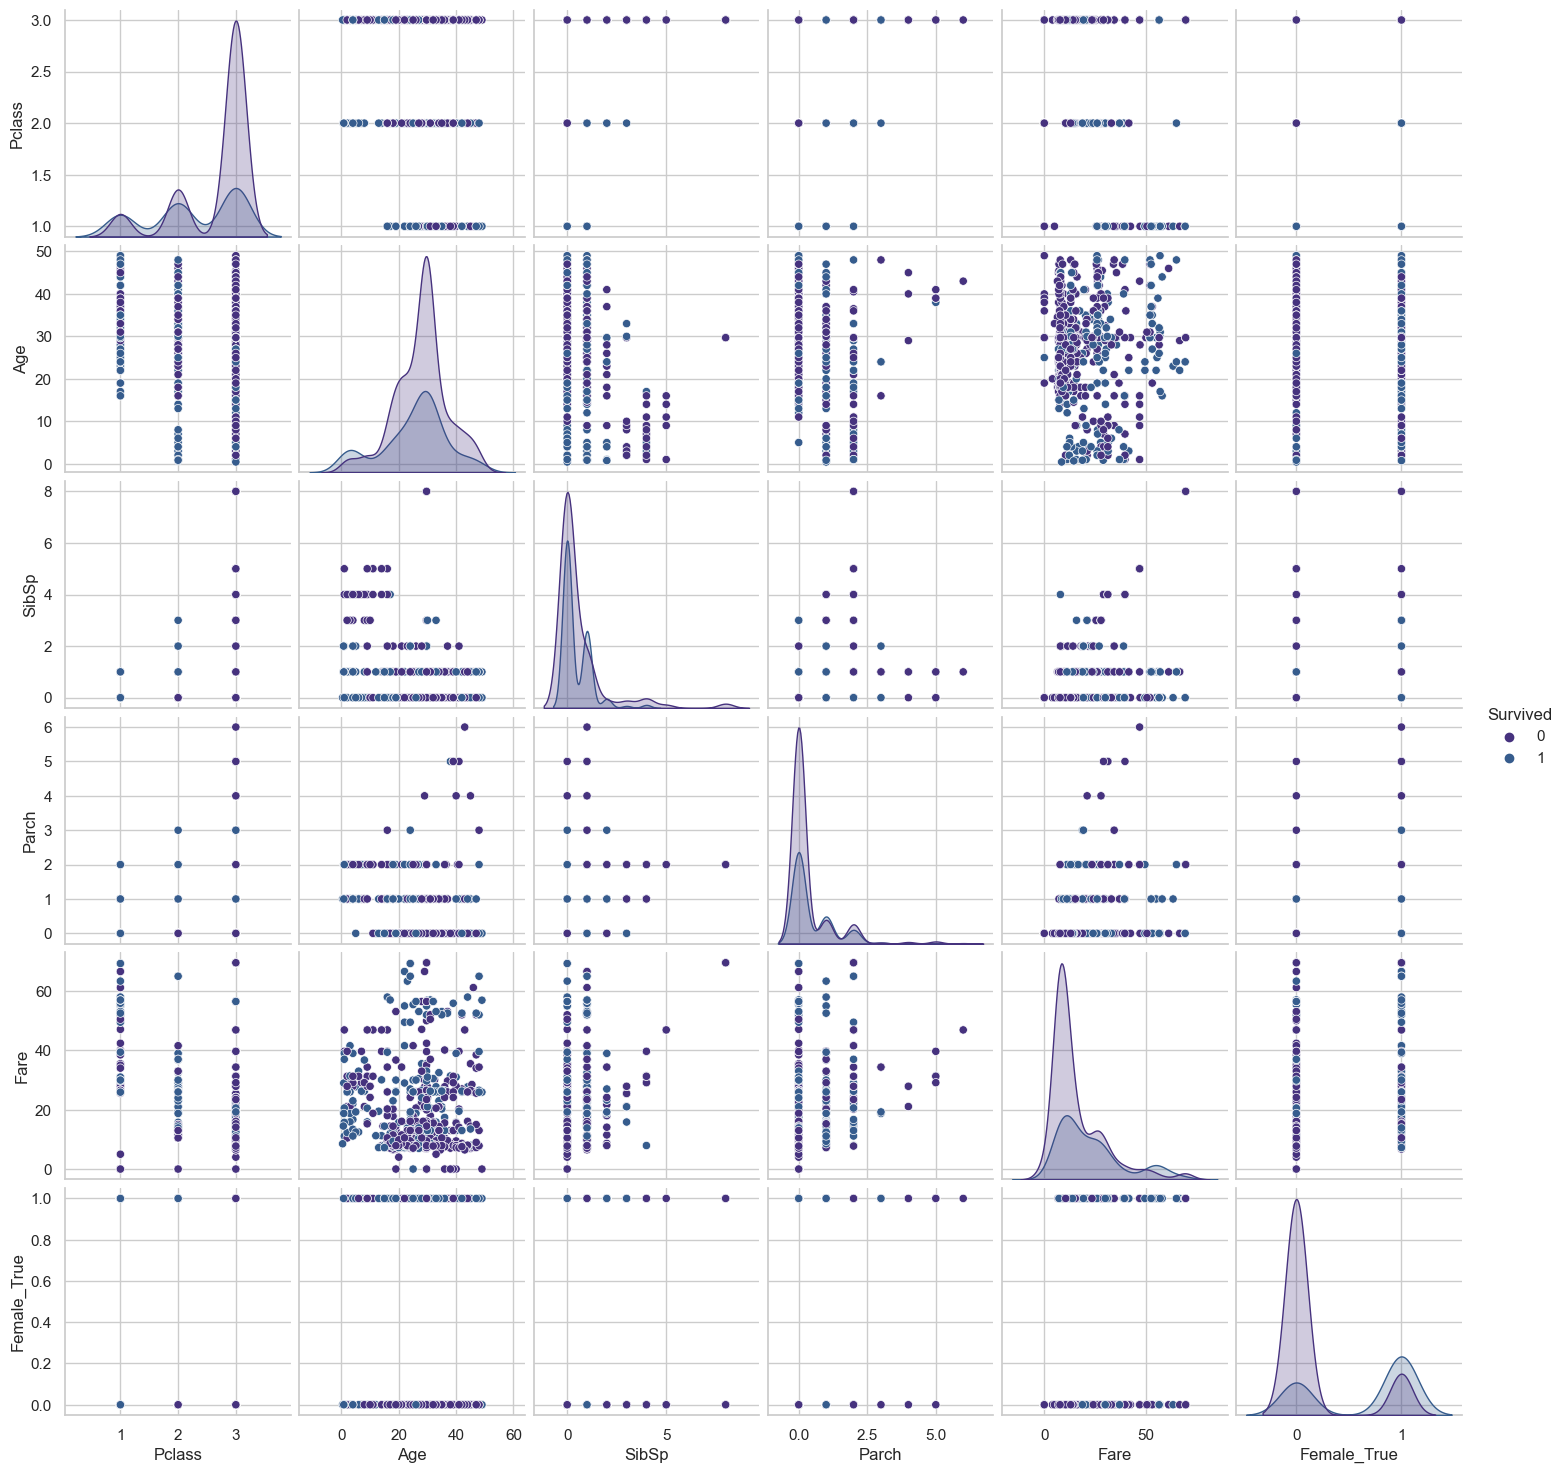

In [95]:
plt.figure(figsize=(15,7))
sns.pairplot(df, hue='Survived')
plt.show()

* MultiVar

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 891
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     731 non-null    int64  
 1   Pclass       731 non-null    int64  
 2   Age          731 non-null    float64
 3   SibSp        731 non-null    int64  
 4   Parch        731 non-null    int64  
 5   Fare         731 non-null    float64
 6   Embarked     731 non-null    object 
 7   Female_True  731 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 51.4+ KB


<AxesSubplot:xlabel='Embarked', ylabel='count'>

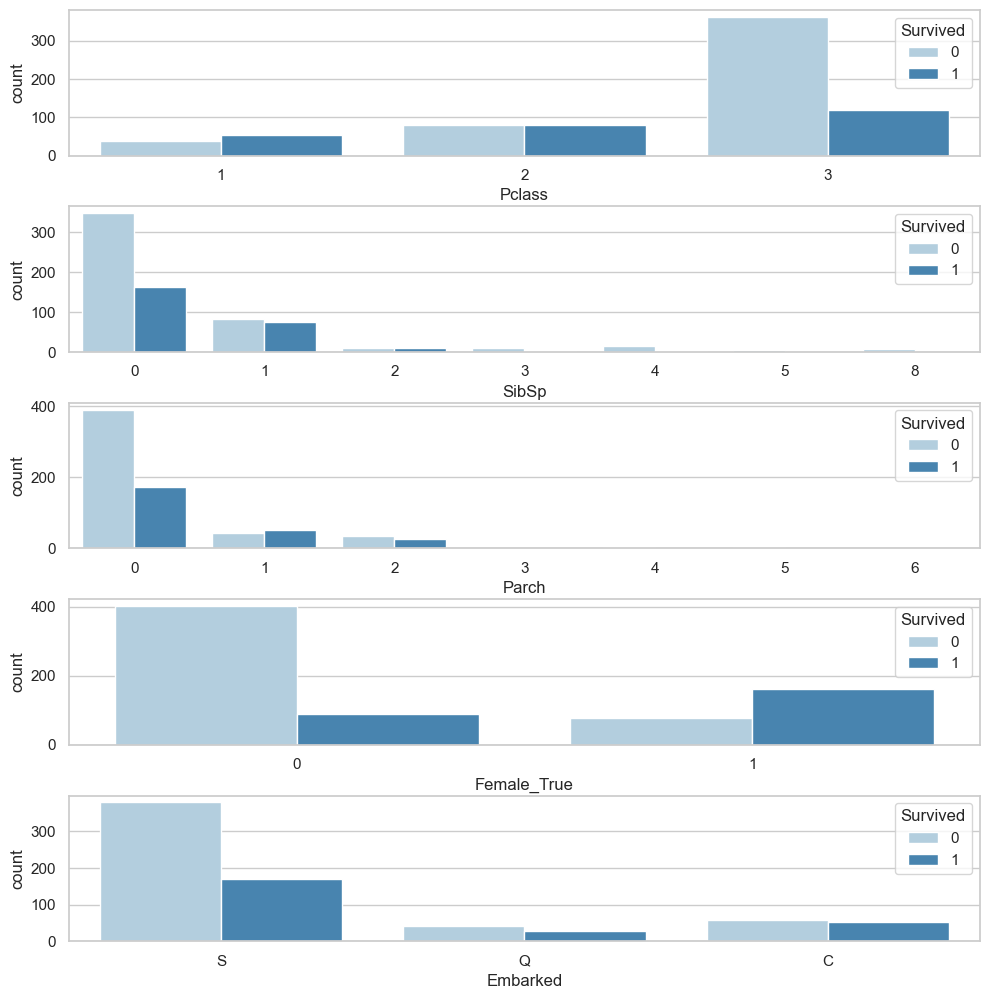

In [97]:
fig, ax = plt.subplots(5,1,figsize=(10,10))
plt.tight_layout()

sns.countplot(x = df['Pclass'], hue=df['Survived'], ax=ax[0], palette='Blues')
sns.countplot(x = df['SibSp'], hue=df['Survived'], ax=ax[1], palette='Blues')
sns.countplot(x = df['Parch'], hue=df['Survived'], ax=ax[2], palette='Blues')
sns.countplot(x = df['Female_True'], hue=df['Survived'], ax=ax[3], palette='Blues')
sns.countplot(x = df['Embarked'], hue=df['Survived'], ax=ax[4], palette='Blues')

In [98]:
quanti_columns = ['Age', 'Fare']
df_quanti = df[quanti_columns]
df_quanti

,Age,Fare
PassengerId,,
1,22.000000,7.2500
3,26.000000,7.9250
4,35.000000,53.1000
5,35.000000,8.0500
6,29.699118,8.4583
...,...,...
887,27.000000,13.0000
888,19.000000,30.0000
889,29.699118,23.4500


Age


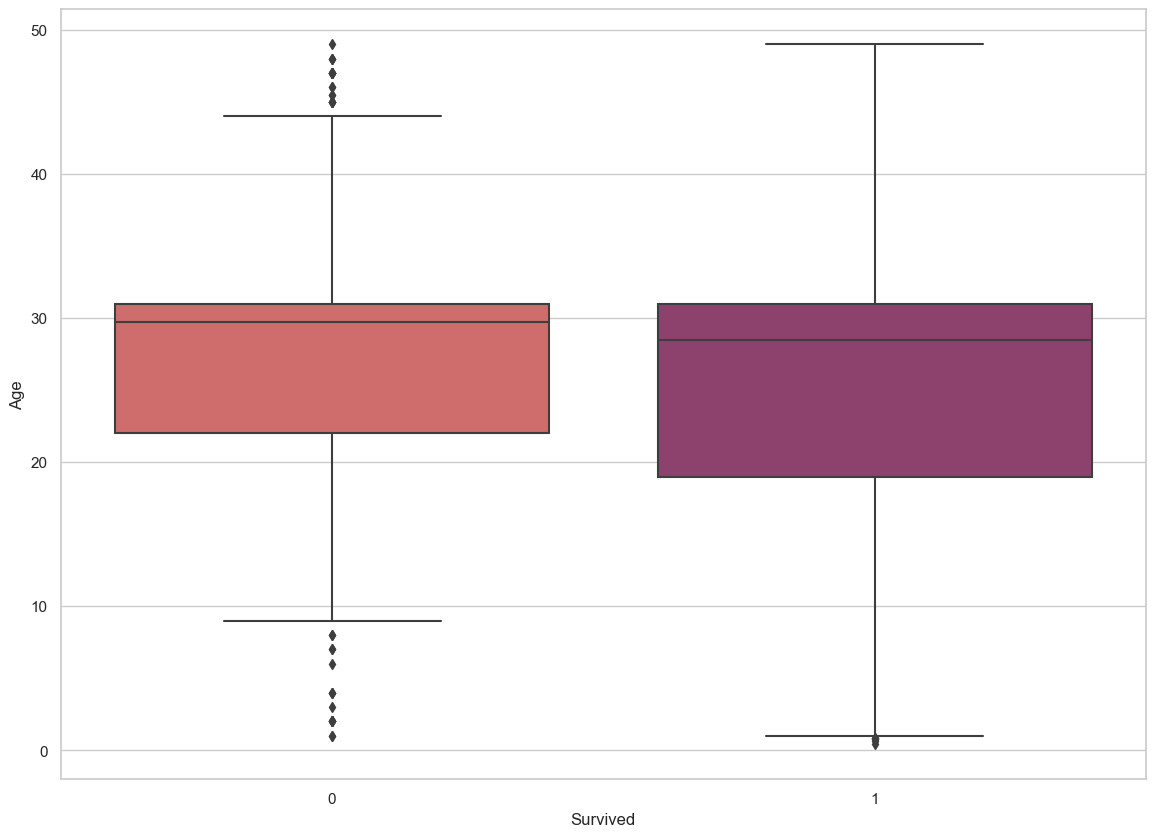

Fare


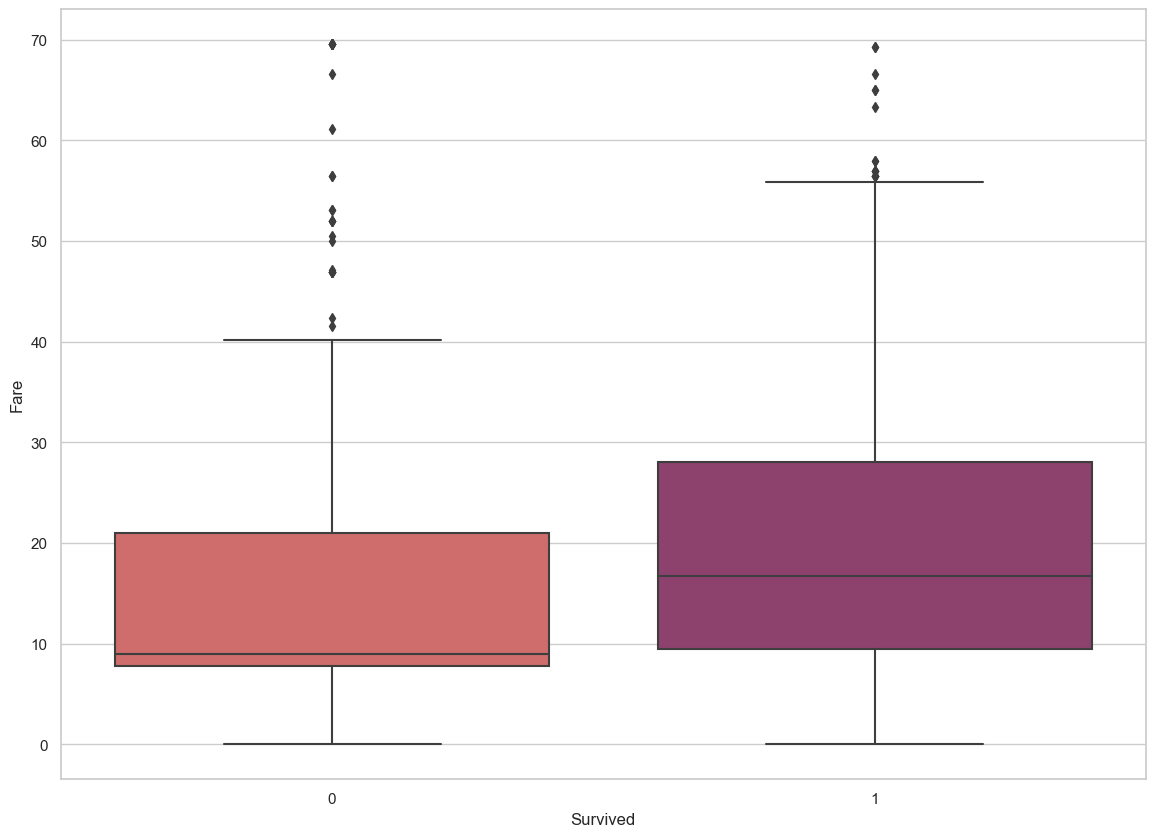

In [99]:
for var_quanti in df_quanti:
    print(var_quanti)
    sns.boxplot(y=df_quanti[var_quanti], x='Survived', data=df, palette='flare')
    plt.show()

In [100]:
df['Embarked'].value_counts()


S    550
C    109
Q     72
Name: Embarked, dtype: int64

In [109]:
df = df.reset_index(drop=True)


In [110]:
val_chang = {
    'S': 1,
    'C': 2,
    'Q': 0
}

df['Embarked_S'] = df['Embarked'].replace(val_chang).reset_index(drop=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Female_True,Embarked_S
0,0,3,22.000000,1,0,7.2500,S,0,1
1,1,3,26.000000,0,0,7.9250,S,1,1
2,1,1,35.000000,1,0,53.1000,S,1,1
3,0,3,35.000000,0,0,8.0500,S,0,1
4,0,3,29.699118,0,0,8.4583,Q,0,0
...,...,...,...,...,...,...,...,...,...
726,0,2,27.000000,0,0,13.0000,S,0,1
727,1,1,19.000000,0,0,30.0000,S,1,1
728,0,3,29.699118,1,2,23.4500,S,1,1
729,1,1,26.000000,0,0,30.0000,C,0,2


In [122]:
df = df.drop(columns=['Embarked'])
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Female_True,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1
1,1,3,26.000000,0,0,7.9250,1,1
2,1,1,35.000000,1,0,53.1000,1,1
3,0,3,35.000000,0,0,8.0500,0,1
4,0,3,29.699118,0,0,8.4583,0,0
...,...,...,...,...,...,...,...,...
726,0,2,27.000000,0,0,13.0000,0,1
727,1,1,19.000000,0,0,30.0000,1,1
728,0,3,29.699118,1,2,23.4500,1,1
729,1,1,26.000000,0,0,30.0000,0,2


#  <a name="modelo">5. Treinamento do modelo</a>
[Voltar ao índice](#indice)

* separando dados entre train x test

In [123]:
X_train, X_val, y_train, y_val = train_test_split(df.drop(columns=['Survived']), df['Survived'], train_size = 0.7, random_state=3)

* Treinando modelo

In [124]:
X_train['Embarked_S'].value_counts()

1    389
2     75
0     47
Name: Embarked_S, dtype: int64

In [125]:
tree = DecisionTreeClassifier(max_leaf_nodes= 10, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=1)

In [127]:
y_pred = tree.predict(X_val)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [153]:
y_val

80     0
97     0
558    0
406    0
124    1
      ..
30     0
322    0
114    0
458    0
453    0
Name: Survived, Length: 220, dtype: int64

#  <a name="avaliacao">6. Avaliação do modelo</a>
[Voltar ao índice](#indice)

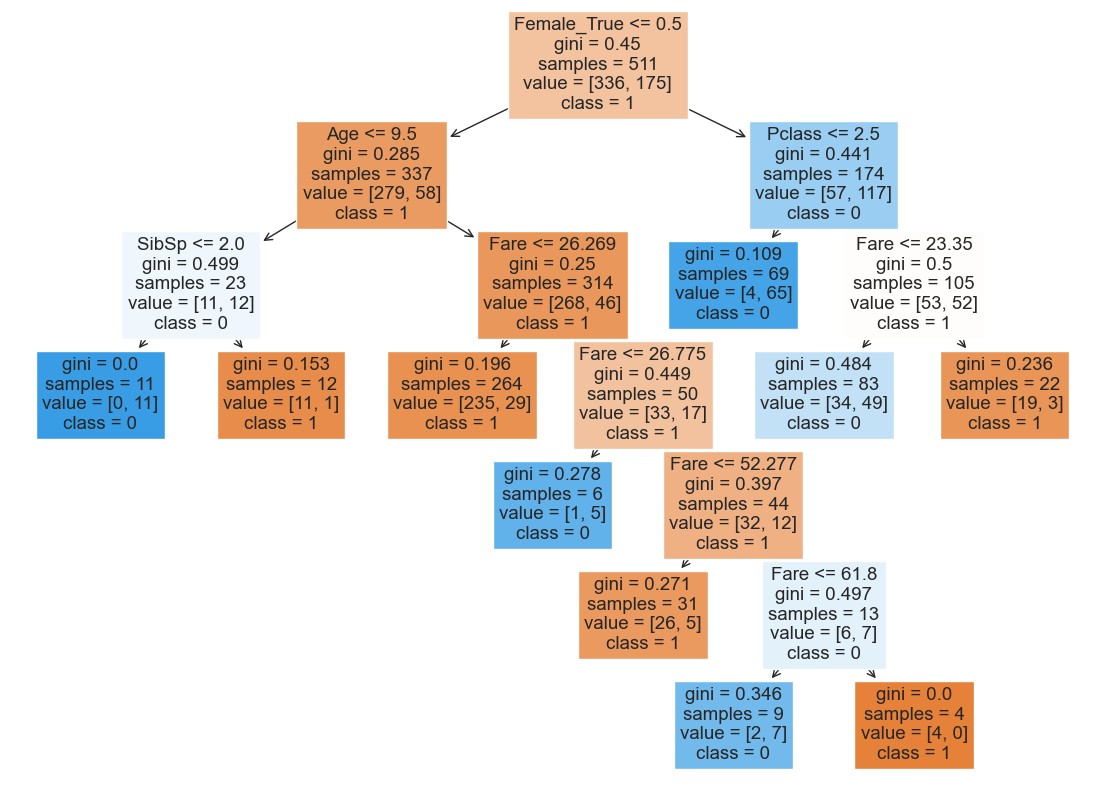

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Female_True', 'Embarked_S']

In [154]:
from sklearn import tree as tr
feat_n = list(df.drop(columns=['Survived']).columns)
tr.plot_tree(tree, feature_names=feat_n, class_names=['1', '0'], filled=True)
plt.show()
              
feat_n


In [138]:

acc = accuracy_score(y_val, y_pred)

metrics = precision_recall_fscore_support(y_val, y_pred, average='binary')
precision = metrics[0]
recall = metrics[1]
fbeta_score = metrics[2]
f1 = f1_score(y_val, y_pred, average='weighted')

print(f'''
    Accuracy = {round(acc,2)},
    Precision = {round(precision,2)},
    Recall = {round(recall,2)},
    F-Beta = {round(fbeta_score,2)},
    F1-Score = {round(f1,2)}
''')


    Accuracy = 0.83,
    Precision = 0.76,
    Recall = 0.77,
    F-Beta = 0.76,
    F1-Score = 0.83



Text(299.75, 0.5, 'Predicted')

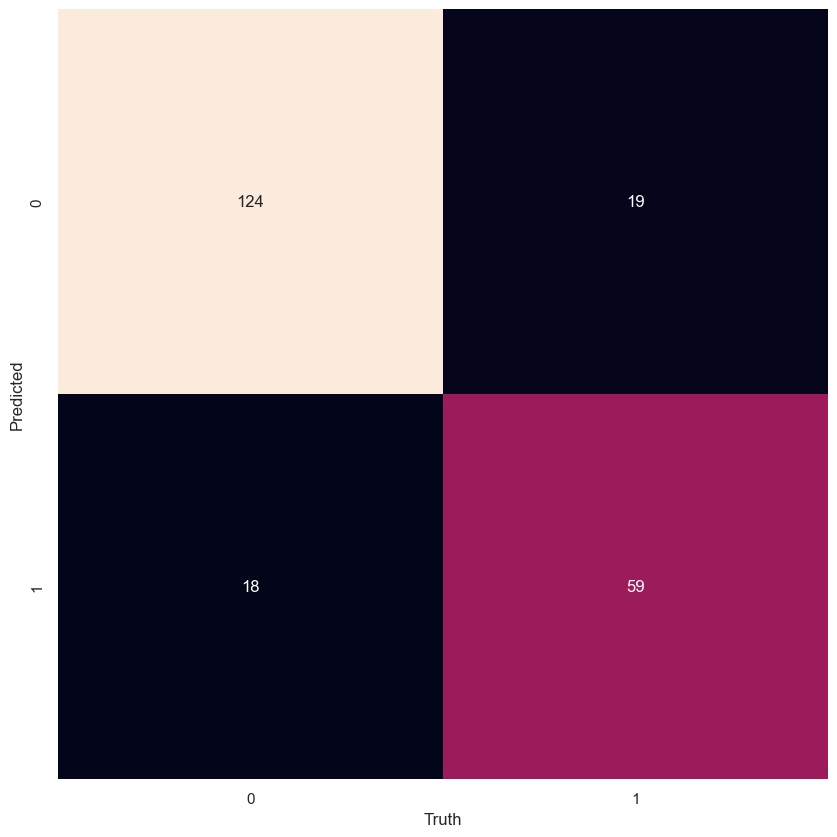

In [141]:
mat = confusion_matrix(y_val, y_pred)

names = np.unique(y_pred)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

#  <a name="aprimoramento">7. Aprimoramento do modelo</a>
[Voltar ao índice](#indice)

#  <a name="conclusao">8. Conclusão</a>
[Voltar ao índice](#indice)